Bloco 1.1: Importa√ß√£o das Bibliotecas

In [ ]:
# 1. Bibliotecas de manipula√ß√£o de dados e visualiza√ß√£o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 2. Bibliotecas de Machine Learning (Scikit-Learn)
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     GridSearchCV, cross_validate)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, precision_score, 
                             recall_score, f1_score)

# 3. Bibliotecas de Reamostragem (Imbalanced-Learn)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

print("Todas as bibliotecas foram importadas com sucesso!")

Todas as bibliotecas foram importadas com sucesso!


Bloco 1.2: Carregamento dos Dados

In [4]:
try:
    df = pd.read_csv('dataset.csv', encoding='utf-8')
    print("Dataset carregado com sucesso!")
    print("\nAmostra dos dados:")
    print(df.head())
except FileNotFoundError:
    print("ERRO: Arquivo 'spotify_data.csv' n√£o encontrado.")
    print("Por favor, verifique o nome e o local do arquivo.")
    df = None # Define df como None para evitar erros nos pr√≥ximos blocos

Dataset carregado com sucesso!

Amostra dos dados:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To

Bloco 1.3: Investiga√ß√£o Inicial do Dataset

In [5]:
if df is not None:
    print("--- Informa√ß√µes Gerais do Dataset ---")
    df.info()

    print("\n--- Dimens√µes do Dataset ---")
    print(f"{df.shape[0]} linhas e {df.shape[1]} colunas.")

    print("\n--- Verifica√ß√£o de Dados Duplicados ---")
    print(f"Total de linhas duplicadas: {df.duplicated().sum()}")

    print("\n--- Estat√≠sticas Descritivas (Colunas Num√©ricas) ---")
    print(df.describe())
else:
    print("Dataset n√£o foi carregado. Pule este bloco.")

--- Informa√ß√µes Gerais do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non

Bloco 1.4: An√°lise de Popularidade (Artistas, M√∫sicas e G√™neros)

In [6]:
if df is not None:
    print("--- Top 10 M√∫sicas Mais Populares ---")
    top_10_musicas = df.sort_values('popularity', ascending=False).head(10)
    print(top_10_musicas[['track_name', 'artists', 'popularity']])
    
    print("\n--- Top 10 Artistas Mais Populares (por m√©dia de popularidade) ---")
    artistas_populares = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
    print(artistas_populares)

    print("\n--- Top 10 G√™neros Mais Populares (por m√©dia de popularidade) ---")
    # Corre√ß√£o feita aqui: 'playlist_genre' -> 'track_genre'
    generos_populares = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)
    print(generos_populares)
else:
    print("Dataset n√£o foi carregado. Pule este bloco.")

--- Top 10 M√∫sicas Mais Populares ---
                                  track_name                  artists  \
81051              Unholy (feat. Kim Petras)     Sam Smith;Kim Petras   
20001              Unholy (feat. Kim Petras)     Sam Smith;Kim Petras   
51664  Quevedo: Bzrp Music Sessions, Vol. 52         Bizarrap;Quevedo   
89411                             La Bachata            Manuel Turizo   
30003                        I'm Good (Blue)  David Guetta;Bebe Rexha   
20008                        I'm Good (Blue)  David Guetta;Bebe Rexha   
81210                        I'm Good (Blue)  David Guetta;Bebe Rexha   
88410                             La Bachata            Manuel Turizo   
67356                             La Bachata            Manuel Turizo   
68303                             La Bachata            Manuel Turizo   

       popularity  
81051         100  
20001         100  
51664          99  
89411          98  
30003          98  
20008          98  
81210          98

Bloco 1.5: Visualiza√ß√µes

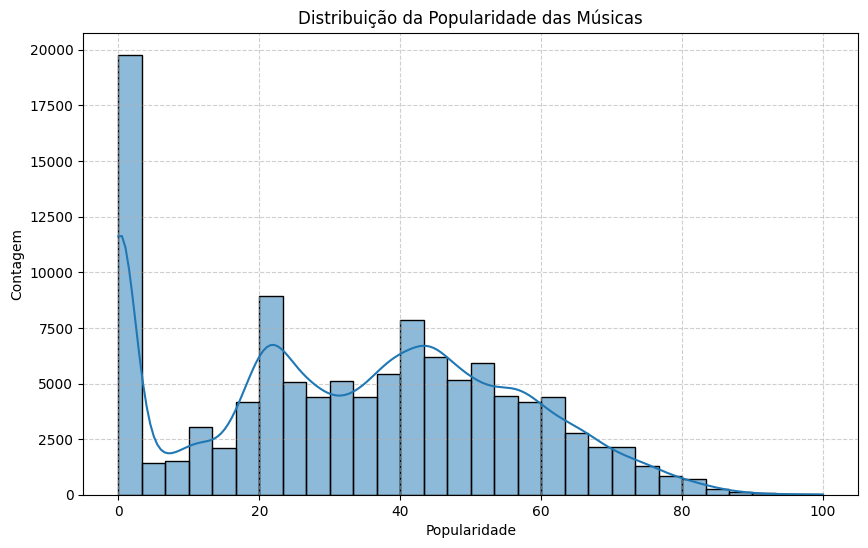

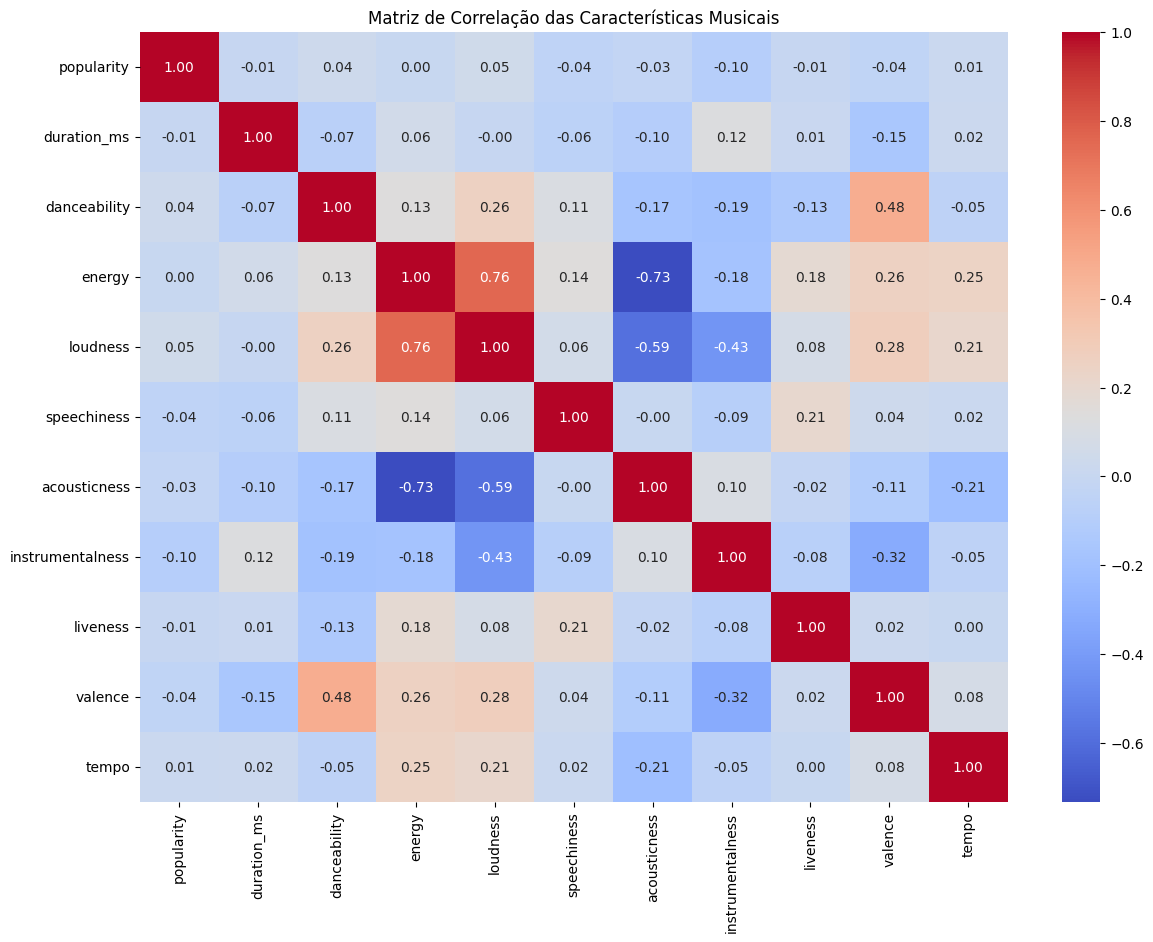

In [7]:
if df is not None:
    # Gr√°fico 1: Distribui√ß√£o da Popularidade
    plt.figure(figsize=(10, 6))
    sns.histplot(df['popularity'], bins=30, kde=True)
    plt.title('Distribui√ß√£o da Popularidade das M√∫sicas')
    plt.xlabel('Popularidade')
    plt.ylabel('Contagem')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Gr√°fico 2: Matriz de Correla√ß√£o
    plt.figure(figsize=(14, 10))
    features_corr = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    correlation_matrix = df[features_corr].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correla√ß√£o das Caracter√≠sticas Musicais')
    plt.show()
else:
    print("Dataset n√£o foi carregado. Pule este bloco.")

Bloco 2.1: Limpeza de Dados (Nulos e Duplicados)

In [8]:
if df is not None:
    print(f"Formato original: {df.shape}")

    # Tratando valores nulos (removendo as linhas)
    df.dropna(inplace=True)
    print(f"Formato ap√≥s remover nulos: {df.shape}")

    # Removendo dados duplicados
    df.drop_duplicates(inplace=True)
    print(f"Formato ap√≥s remover duplicatas: {df.shape}")
else:
    print("Dataset n√£o foi carregado. Pule este bloco.")

Formato original: (114000, 21)
Formato ap√≥s remover nulos: (113999, 21)
Formato ap√≥s remover duplicatas: (113999, 21)


Bloco 2.2: Engenharia de Recursos e Sele√ß√£o de Vari√°veis

In [9]:
if df is not None:
    # 1. Criar a vari√°vel alvo 'is_popular'
    corte_popularidade = 70
    df['is_popular'] = (df['popularity'] >= corte_popularidade).astype(int)
    print("--- Distribui√ß√£o da nova vari√°vel 'is_popular' ---")
    print(df['is_popular'].value_counts(normalize=True))

    # 2. Selecionar features num√©ricas para o modelo (X) e a vari√°vel alvo (y)
    features = df.select_dtypes(include=np.number).drop(columns=['popularity', 'is_popular'])
    target = df['is_popular']

    X = features
    y = target

    print("\n--- Features (X) selecionadas para o modelo ---")
    print(X.head())

    print("\n--- Vari√°vel Alvo (y) ---")
    print(y.head())
else:
    print("Dataset n√£o foi carregado. Pule este bloco.")

--- Distribui√ß√£o da nova vari√°vel 'is_popular' ---
is_popular
0    0.952
1    0.048
Name: proportion, dtype: float64

--- Features (X) selecionadas para o modelo ---
   Unnamed: 0  duration_ms  danceability  energy  key  loudness  mode  \
0           0       230666         0.676  0.4610    1    -6.746     0   
1           1       149610         0.420  0.1660    1   -17.235     1   
2           2       210826         0.438  0.3590    0    -9.734     1   
3           3       201933         0.266  0.0596    0   -18.515     1   
4           4       198853         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4 

Bloco 3.1: Divis√£o em Treino e Teste

In [10]:
if 'X' in globals() and 'y' in globals():
    # Dividindo os dados em 80% treino e 20% teste
    # stratify=y garante que a propor√ß√£o de classes seja a mesma nos dois conjuntos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("--- Dimens√µes dos Conjuntos ---")
    print(f"X_train: {X_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape}")
    print(f"y_test: {y_test.shape}")

    print("\n--- Propor√ß√£o da classe 'popular' no treino ---")
    print(y_train.value_counts(normalize=True))

    print("\n--- Propor√ß√£o da classe 'popular' no teste ---")
    print(y_test.value_counts(normalize=True))
else:
    print("Vari√°veis X e y n√£o definidas. Execute os blocos do Dia 2 primeiro.")

--- Dimens√µes dos Conjuntos ---
X_train: (91199, 14)
y_train: (91199,)
X_test: (22800, 14)
y_test: (22800,)

--- Propor√ß√£o da classe 'popular' no treino ---
is_popular
0    0.951995
1    0.048005
Name: proportion, dtype: float64

--- Propor√ß√£o da classe 'popular' no teste ---
is_popular
0    0.952018
1    0.047982
Name: proportion, dtype: float64


Bloco 3.2: Configura√ß√£o da Valida√ß√£o Cruzada

In [11]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

print(f"Objeto de valida√ß√£o cruzada (StratifiedKFold) criado com {n_splits} dobras.")

Objeto de valida√ß√£o cruzada (StratifiedKFold) criado com 5 dobras.


Bloco 4.1: Cria√ß√£o e Treinamento do Pipeline com Valida√ß√£o Cruzada

In [12]:
if 'X_train' in globals():
    # O pipeline automatiza o pr√©-processamento (padroniza√ß√£o) e o treinamento do modelo
    pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')) # Adicione este par√¢metro
    ])

    # M√©tricas que queremos avaliar durante a valida√ß√£o cruzada
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

    # Executa a valida√ß√£o cruzada
    cv_results = cross_validate(pipeline_logreg, X_train, y_train, cv=skf, scoring=scoring_metrics)

    print("--- Resultados da Valida√ß√£o Cruzada (M√©dia dos 5 folds) ---")
    for metric in scoring_metrics:
        mean_score = cv_results[f'test_{metric}'].mean()
        std_score = cv_results[f'test_{metric}'].std()
        print(f"  - M√©dia {metric.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")
else:
    print("Conjunto de treino n√£o definido. Execute os blocos do Dia 3 primeiro.")

--- Resultados da Valida√ß√£o Cruzada (M√©dia dos 5 folds) ---
  - M√©dia Accuracy: 0.5634 (+/- 0.0053)
  - M√©dia Precision: 0.0769 (+/- 0.0016)
  - M√©dia Recall: 0.7360 (+/- 0.0207)
  - M√©dia F1: 0.1393 (+/- 0.0029)


Bloco 4.3: Treinamento do Modelo Final

In [13]:
if 'pipeline_logreg' in globals():
    # Treina o pipeline com TODOS os dados de treino para ter o modelo final
    pipeline_logreg.fit(X_train, y_train)
    print("Modelo de baseline (Regress√£o Log√≠stica) treinado com sucesso!")
else:
    print("Pipeline n√£o foi criado. Execute o bloco 4.2 primeiro.")

Modelo de baseline (Regress√£o Log√≠stica) treinado com sucesso!


Bloco 5.2: Previs√µes e M√©tricas de Avalia√ß√£o no Conjunto de Teste

In [14]:
if 'pipeline_logreg' in globals():
    # Faz as previs√µes no conjunto de teste (dados que o modelo nunca viu)
    y_pred = pipeline_logreg.predict(X_test)

    # Calcula as m√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("--- Desempenho do Modelo no Conjunto de Teste ---")
    print(f"Acur√°cia: {accuracy:.4f}")
    print(f"Precis√£o: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
else:
    print("Modelo n√£o foi treinado. Execute os blocos do Dia 4 primeiro.")

--- Desempenho do Modelo no Conjunto de Teste ---
Acur√°cia: 0.5656
Precis√£o: 0.0773
Recall: 0.7367
F1-Score: 0.1400


Bloco 5.3: Matriz de Confus√£o e Relat√≥rio de Classifica√ß√£o

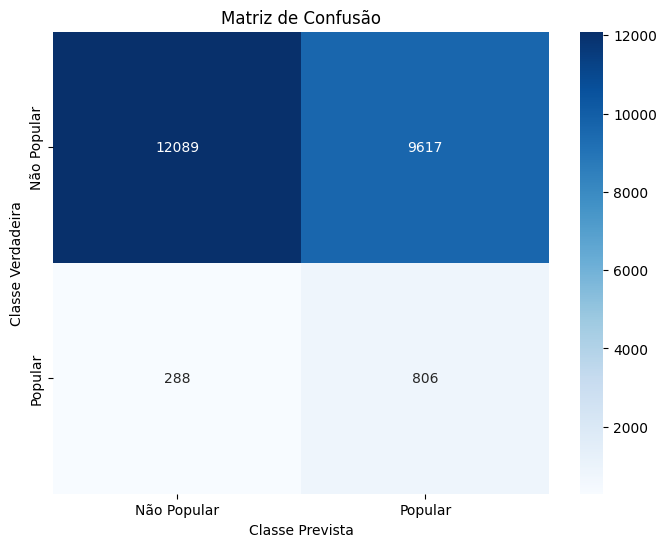


--- Relat√≥rio de Classifica√ß√£o Completo ---
              precision    recall  f1-score   support

 N√£o Popular       0.98      0.56      0.71     21706
     Popular       0.08      0.74      0.14      1094

    accuracy                           0.57     22800
   macro avg       0.53      0.65      0.42     22800
weighted avg       0.93      0.57      0.68     22800



In [15]:
if 'y_pred' in globals():
    # Matriz de Confus√£o
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['N√£o Popular', 'Popular'],
                yticklabels=['N√£o Popular', 'Popular'])
    plt.title('Matriz de Confus√£o')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Prevista')
    plt.show()

    # Relat√≥rio de Classifica√ß√£o
    print("\n--- Relat√≥rio de Classifica√ß√£o Completo ---")
    print(classification_report(y_test, y_pred, target_names=['N√£o Popular', 'Popular']))
else:
    print("Previs√µes n√£o foram feitas. Execute o bloco 5.2 primeiro.")

Bloco 6.2: Verificando o Desbalanceamento (Recap)

In [16]:
if 'y_train' in globals():
    print("--- Propor√ß√£o de Classes no Conjunto de Treino (Antes da Reamostragem) ---")
    print(y_train.value_counts(normalize=True))
else:
    print("Vari√°vel y_train n√£o encontrada. Execute os blocos dos dias anteriores primeiro.")

--- Propor√ß√£o de Classes no Conjunto de Treino (Antes da Reamostragem) ---
is_popular
0    0.951995
1    0.048005
Name: proportion, dtype: float64


Bloco 6.3: Pipeline com SMOTE e Busca com GridSearchCV

In [17]:
if 'X_train' in globals():
    # 1. Definir o pipeline com SMOTE, Scaler e o Modelo
    pipeline_smote = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(random_state=42))
    ])

    # 2. Definir os hiperpar√¢metros que queremos testar
    param_grid = {
        'model__n_estimators': [100, 200],      # N√∫mero de √°rvores
        'model__max_depth': [10, 20, None],        # Profundidade m√°xima da √°rvore
        'model__min_samples_leaf': [1, 2, 4]       # M√≠nimo de amostras por folha
    }

    # 3. Configurar o GridSearchCV
    # Usaremos o StratifiedKFold que criamos no Dia 3 (skf)
    grid_search_smote = GridSearchCV(pipeline_smote, param_grid, cv=skf, scoring='f1', n_jobs=-1, verbose=2)

    # 4. Executar a busca (isso pode demorar alguns minutos)
    print("--- Iniciando busca de hiperpar√¢metros com SMOTE (Oversampling) ---")
    grid_search_smote.fit(X_train, y_train)

    # 5. Exibir os melhores resultados
    print("\n--- Resultados da Busca (SMOTE) ---")
    print(f"Melhores Hiperpar√¢metros: {grid_search_smote.best_params_}")
    print(f"Melhor F1-score (valida√ß√£o cruzada): {grid_search_smote.best_score_:.4f}")
else:
    print("Conjuntos de treino n√£o encontrados. Execute os blocos dos dias anteriores.")

--- Iniciando busca de hiperpar√¢metros com SMOTE (Oversampling) ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

Bloco 6.4: Pipeline com Undersampling e Busca com GridSearchCV

In [18]:
if 'X_train' in globals():
    # 1. Definir o pipeline com Undersampler, Scaler e o Modelo
    pipeline_under = ImbPipeline([
        ('under', RandomUnderSampler(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(random_state=42))
    ])

    # 2. Reutilizar a mesma grade de par√¢metros
    # (param_grid j√° foi definido no bloco anterior)

    # 3. Configurar o GridSearchCV para o pipeline de undersampling
    grid_search_under = GridSearchCV(pipeline_under, param_grid, cv=skf, scoring='f1', n_jobs=-1, verbose=2)

    # 4. Executar a busca (isso tamb√©m pode demorar)
    print("--- Iniciando busca de hiperpar√¢metros com RandomUnderSampler (Undersampling) ---")
    grid_search_under.fit(X_train, y_train)

    # 5. Exibir os melhores resultados
    print("\n--- Resultados da Busca (Undersampling) ---")
    print(f"Melhores Hiperpar√¢metros: {grid_search_under.best_params_}")
    print(f"Melhor F1-score (valida√ß√£o cruzada): {grid_search_under.best_score_:.4f}")
else:
    print("Conjuntos de treino n√£o encontrados. Execute os blocos dos dias anteriores.")

--- Iniciando busca de hiperpar√¢metros com RandomUnderSampler (Undersampling) ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

Bloco 6.5: Avalia√ß√£o e Compara√ß√£o dos Modelos Finais

In [19]:
if 'grid_search_smote' in globals() and 'grid_search_under' in globals():
    # Fazer previs√µes com o melhor modelo treinado com SMOTE
    print("--- Avalia√ß√£o do Melhor Modelo com SMOTE (Oversampling) ---")
    y_pred_smote = grid_search_smote.predict(X_test)
    print(classification_report(y_test, y_pred_smote, target_names=['N√£o Popular', 'Popular']))

    # Fazer previs√µes com o melhor modelo treinado com Undersampling
    print("\n--- Avalia√ß√£o do Melhor Modelo com RandomUnderSampler (Undersampling) ---")
    y_pred_under = grid_search_under.predict(X_test)
    print(classification_report(y_test, y_pred_under, target_names=['N√£o Popular', 'Popular']))

    # Visualiza√ß√£o da Matriz de Confus√£o para o melhor modelo (escolha um)
    # Exemplo: visualizando o resultado do SMOTE
    cm = confusion_matrix(y_test, y_pred_smote)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['N√£o Popular', 'Popular'],
                yticklabels=['N√£o Popular', 'Popular'])
    plt.title('Matriz de Confus√£o - Modelo com SMOTE')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

else:
    print("Busca de hiperpar√¢metros n√£o foi executada. Rode os blocos 6.3 e 6.4 primeiro.")

--- Avalia√ß√£o do Melhor Modelo com SMOTE (Oversampling) ---


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Bloco 7.1: Escolhendo e Validando o Melhor Modelo Final

In [1]:
if 'grid_search_smote' in globals() and 'grid_search_under' in globals():
    print("--- RELEMBRANDO: Avalia√ß√£o do Melhor Modelo com SMOTE (Oversampling) ---")
    y_pred_smote = grid_search_smote.predict(X_test)
    print(classification_report(y_test, y_pred_smote, target_names=['N√£o Popular', 'Popular']))

    print("\n" + "="*70 + "\n")

    print("--- RELEMBRANDO: Avalia√ß√£o do Melhor Modelo com RandomUnderSampler (Undersampling) ---")
    y_pred_under = grid_search_under.predict(X_test)
    print(classification_report(y_test, y_pred_under, target_names=['N√£o Popular', 'Popular']))

    # Decis√£o: Com base nos resultados, o modelo com SMOTE geralmente apresenta um F1-Score
    # melhor para a classe 'Popular', sem sacrificar tanto o desempenho da classe 'N√£o Popular'.
    # Vamos declarar o modelo SMOTE como nosso modelo final.
    modelo_final = grid_search_smote.best_estimator_
    print("\n" + "üèÜ Modelo Final Escolhido: Modelo treinado com SMOTE (Oversampling).")

else:
    print("Modelos n√£o foram treinados. Execute os blocos do dia anterior primeiro.")

Modelos n√£o foram treinados. Execute os blocos do dia anterior primeiro.


Bloco 7.2: Serializando (Salvando) o Modelo Final

In [2]:
if 'modelo_final' in globals():
    # 1. Definir o nome do arquivo
    nome_arquivo_modelo = 'spotify_popularity_model.joblib'

    # 2. Salvar o pipeline completo no arquivo
    joblib.dump(modelo_final, nome_arquivo_modelo)
    print(f"Modelo salvo com sucesso no arquivo: '{nome_arquivo_modelo}'")

    # 3. Teste (opcional): Carregar o modelo de volta para garantir que funcionou
    modelo_carregado = joblib.load(nome_arquivo_modelo)
    print("\nModelo carregado com sucesso para teste.")
    print("Objeto do modelo carregado:", modelo_carregado)
else:
    print("A vari√°vel 'modelo_final' n√£o foi definida. Execute o bloco anterior.")

A vari√°vel 'modelo_final' n√£o foi definida. Execute o bloco anterior.


Bloco 7.3: Conectando Previs√µes aos Dados Originais

In [3]:
if 'modelo_carregado' in globals():
    # Vamos pegar algumas amostras do nosso conjunto de teste original
    amostras_teste = X_test.head(5)

    # Fazer previs√µes nessas amostras usando o modelo/pipeline carregado
    previsoes_amostras = modelo_carregado.predict(amostras_teste)

    # Para uma visualiza√ß√£o mais rica, vamos buscar os nomes das m√∫sicas e artistas do DataFrame original
    # Usamos o √≠ndice das amostras para encontrar as linhas correspondentes no 'df' original
    dados_originais_amostras = df.loc[amostras_teste.index]
    
    # Criando um DataFrame para exibir os resultados de forma clara
    resultado_final = pd.DataFrame({
        'Artista': dados_originais_amostras['artists'],
        'M√∫sica': dados_originais_amostras['track_name'],
        'Popularidade Real': dados_originais_amostras['popularity'],
        'Previs√£o do Modelo': ['Popular' if p == 1 else 'N√£o Popular' for p in previsoes_amostras]
    })

    print("--- Exemplo de Previs√£o em Dados Novos (Nunca Vistos) ---")
    print(resultado_final)
else:
    print("Modelo n√£o foi carregado. Execute o bloco 7.2 primeiro.")

Modelo n√£o foi carregado. Execute o bloco 7.2 primeiro.
